# Computer Vision 

# Exercise 3: Linear Filtering

- TU Chemnitz
    - Fak. für Informatik
        - Professur Künstliche Intelligenz
            - Lehre
                - Bildverstehen
     
Contact:
* julien dot vitay at informatik dot tu-chemnitz dot de
* abbas dot al-ali at informatik dot tu-chemnitz dot de

Course web page:
[https://www.tu-chemnitz.de/informatik/KI/edu/biver/](https://www.tu-chemnitz.de/informatik/KI/edu/biver/)

## 1D Filtering

- Create a 1D step signal of length 101, with zeros everywhere except between 40 and 60 where it is one.

<img src="img/org-signal.png" alt="img/org-signal.png" width="400"/>

In [5]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import cv2

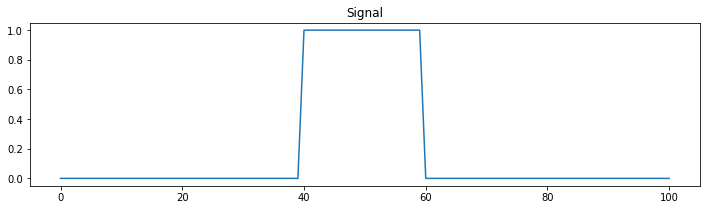

In [22]:
signal = np.zeros(101)
signal[40:60] = 1.0
plt.figure(figsize=(12,3))
plt.plot(signal)
plt.title('Signal')
plt.show()

- Write a `filter_signal(signal, filter)` method to filter this signal with a desired kernel (Box3 and Central Differences), using zero-padding.

$$ g(t) = \sum_{k=-1}^{+1} h(k) \cdot f(t + k) $$

- **Box filter of size 3**

$$ h_\text{low} = \frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} $$

- **Central differences**

$$ h_\text{high} = \begin{bmatrix} -1 & 0 & 1 \end{bmatrix} $$

- You will make the function robust to different signal lengths and kernel sizes.

- Zero-padding means that you will replace signal values $f(t + k)$ outside the range `[0, 100]` with zeros.

- The filtered signal should have the same length as the original signal.

- Plot the original signal with the two filtered versions.

- Conclude on the role of each filter.

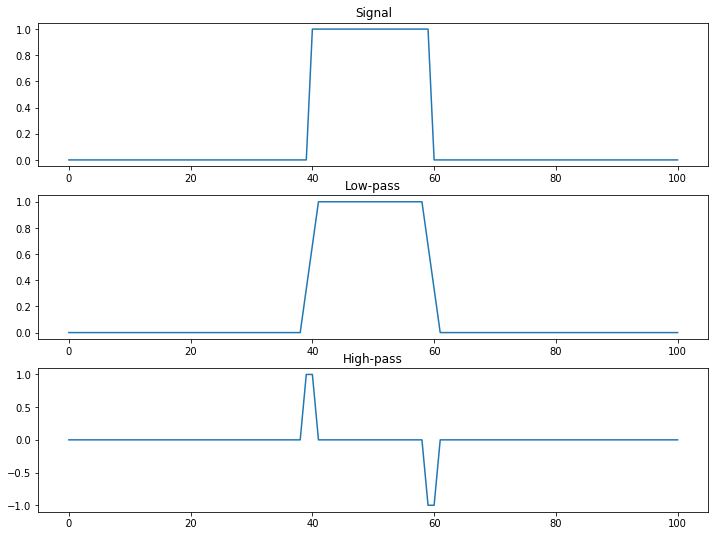

In [16]:
low_filter  = np.array([1., 1., 1.])/3.
high_filter = np.array([-1., 0., 1.])

def filter_signal(signal, filter):
    "1D filtering with zero-padding"

    result = np.zeros(signal.size)
    
    for t in range(signal.size):
        for k in range(filter.size):
            idx = t + (k - int(filter.size/2.0))
            if idx < 0 or idx >= signal.size:
                result[t] += 0.0
            else:
                result[t] += filter[k] * signal[idx]

    return result

signal_low  = filter_signal(signal, low_filter )
signal_high = filter_signal(signal, high_filter)
plt.figure(figsize=(12,9))

plt.subplot(311)
plt.plot(signal)
plt.title('Signal')
plt.subplot(312)
plt.plot(signal_low)
plt.title('Low-pass')
plt.subplot(313)
plt.plot(signal_high)
plt.title('High-pass')
plt.show()

#0 to 2k (here k =1) 

#zero padding for the initial and end positions

#Lowpass filter for noise removal(removes high frequency noise)

#Highpass filter for edge detection(Since edges are fast variations)

## Effect of the width of the box filter

- Filter the signal with a box filter of size 11 (11 elements) and compare.

$$
    h_\text{low} = \frac{1}{11} \begin{bmatrix} 1 & 1 & \ldots & 1 & 1 \end{bmatrix}
$$

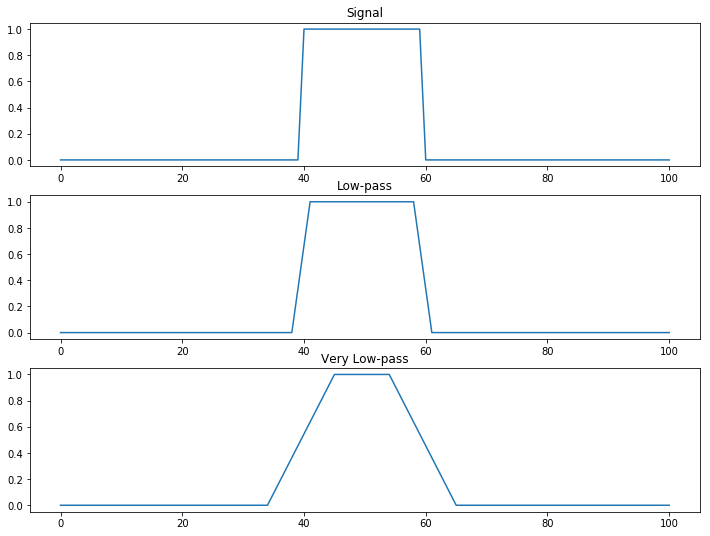

In [17]:
verylow_filter = np.ones(11)/11.
signal_verylow = filter_signal(signal, verylow_filter)
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(signal)
plt.title('Signal')

plt.subplot(312)
plt.plot(signal_low)
plt.title('Low-pass')

plt.subplot(313)
plt.plot(signal_verylow)
plt.title('Very Low-pass')

plt.show()

## Effect of noise on highpass filtering

- Add Gaussian noise (zero mean, variance 0.3) to the original signal and filter it with the central differences filters. Can you still detect the edges?

```python
np.random.normal(0., 0.3, 101)
```

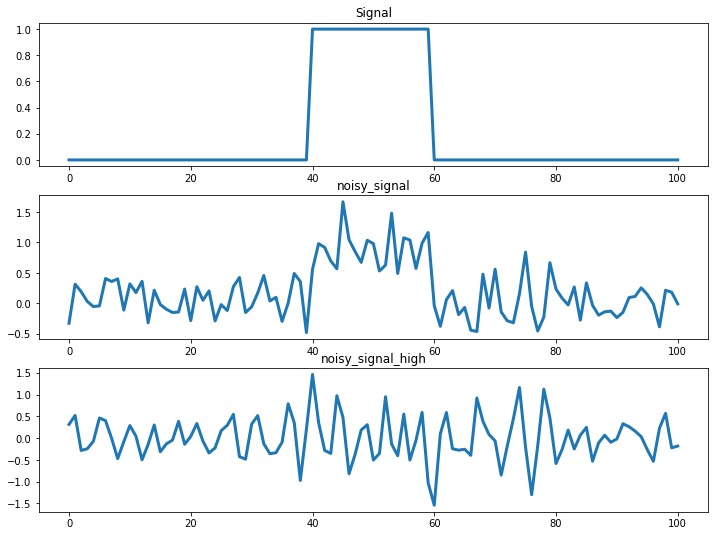

In [23]:
noisy_signal = signal + np.random.normal(0., 0.3, 101)
noisy_signal_high = filter_signal(noisy_signal, high_filter)
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(signal,lw=3)
plt.title('Signal')

plt.subplot(312)
plt.plot(noisy_signal,lw=3)
plt.title('noisy_signal')

plt.subplot(313)
plt.plot(noisy_signal_high,lw=3)
plt.title('noisy_signal_high')

plt.show()

- Filter first the noisy signal with the Box11 filter and then with the central differences ones. What happened?

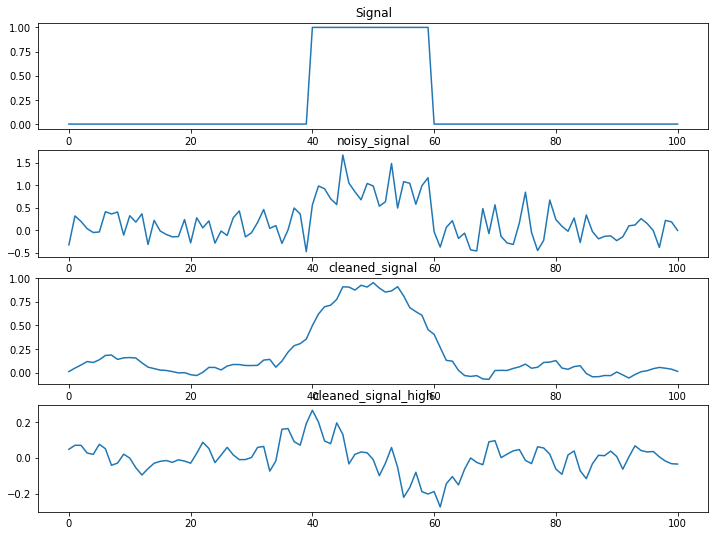

In [24]:
cleaned_signal = filter_signal(noisy_signal, verylow_filter)
cleaned_signal_high = filter_signal(cleaned_signal, high_filter)
plt.figure(figsize=(12,9))
plt.subplot(411)
plt.plot(signal)
plt.title('Signal')

plt.subplot(412)
plt.plot(noisy_signal)
plt.title('noisy_signal')

plt.subplot(413)
plt.plot(cleaned_signal)
plt.title('cleaned_signal')

plt.subplot(414)
plt.plot(cleaned_signal_high)
plt.title('cleaned_signal_high')

plt.show()

## 2D Filtering

- A filter on 2D images works exactly the same as in 1D, except you have to do a double sum.

- We could implement it with for loops, but it is much faster to use the OpenCV method `filter2D`:

```python
# Load an image
img_gray = cv2.imread('lena.jpg', 0)
# Create a filter as a matrix
box3 = np.ones((3, 3))/9.
# Filter the image
result = cv2.filter2D(img, -1, box3)
```

- the first argument is the original image

- the second is the desired bit encoding: -1 to have the same depth as the original image (`cv2.CV_8U` or `np.uint8`), `cv2.CV_64F` for floats...

- the third is the desired filter.

Check the doc: [http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d)

* Note that for filtering, it is better to work on grayscale images.

### Box filtering

- Apply a box filter with sizes ranging from 3 to 13 in steps of 2.

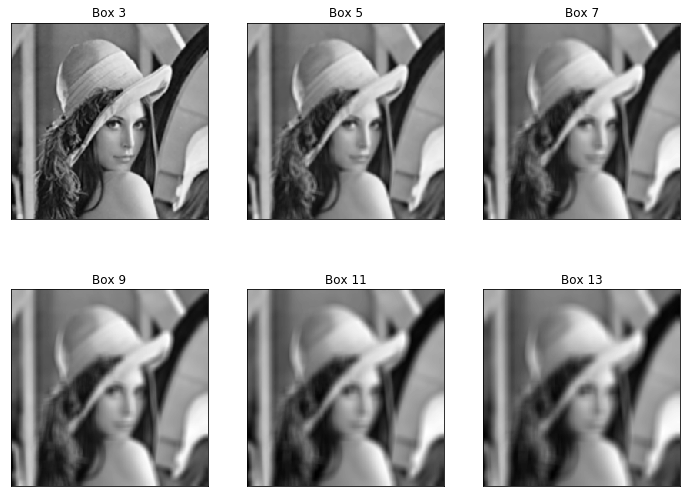

In [28]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)
plt.figure(figsize=(12,9))
idx = 1
for k in range(3, 15, 2):
    # Create the box filter
    box_filter = np.ones((k, k))/float(k**2)
    # Filter the image
    result = cv2.filter2D(img, -1, box_filter)
    # Display the filtered image using matplotlib
    plt.subplot(230 + idx)
    plt.imshow(result, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title('Box ' + str(k))
    idx +=1

plt.show()

#Low Pass filters like box and Gaussian filters add blurring effects

- For box filtering, you have basically three options:

**Method 1:** Create the box filter as a Numpy matrix and use it :

```python
# Create a kxk filter as a matrix
k = 11
box_filter = np.ones((k, k))/(k*k)
# Filter the image
result = cv2.filter2D(img, -1, box_filter)
```

**Method 2:** Ask OpenCV to apply directly the filter for you with `cv2.boxFilter`:

```python
result = cv2.boxFilter(img, -1, (11, 11))
```

The second argument is the bit encoding, the third is the kernel size (here 11x11)

**Method 3:** Use the ``blur()`` method, which does exactly the same operation:

```python
result = cv2.blur(img, (11, 11))
```

- Check the doc: [http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#boxfilter](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#boxfilter) and try the second option with different kernel sizes. Is there any difference?

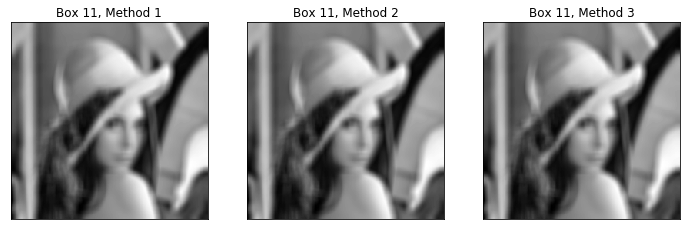

In [29]:
######################
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)
plt.figure(figsize=(12,9))
# Method 1
box_filter = np.ones((11, 11))/(11**2)
result = cv2.filter2D(img, -1, box_filter)

plt.subplot(131)
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 1')
     
# Method 2
result = cv2.boxFilter(img, -1, (11, 11))
plt.subplot(132)
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 2')

# Method 3
plt.subplot(133)
result = cv2.blur(img, (11, 11))
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 3')

plt.show()

### Gaussian Filtering

The same is true for Gaussian filters:

**Method 1:** Create your own Gaussian kernel and pass it to ``filter2D``. Example for a 5x5 Gaussian filter:

$$
h = \frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \\ \end{bmatrix} 
$$

- Create a 5x5 Gaussian filter and apply it on the `lena.jpg` image.

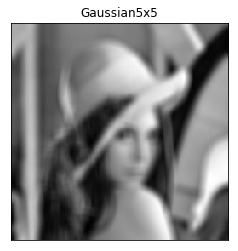

In [13]:
Gaussian5x5 = 1./256. * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
result = cv2.filter2D(img, -1, box_filter)
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('Gaussian5x5')
plt.show()

# Separable filters

The problem is that you do not obligatorily know exact values for a 11x11 Gaussian filter, and that it would make a **lot** of values to type ...

<img src="img/separable.png" alt="img/separable.png" width="800"/>


**Method 2:** Ask OpenCV to create a **1D** Gaussian filter (separable filters) and apply it in both directions using ``sepFilter2D()``:

```python
gaussian_kernel = cv2.getGaussianKernel(11, -1)

result = cv2.sepFilter2D(img, -1, gaussian_kernel, gaussian_kernel)
```

- Look at the documentation of `sepFilter2D` to understand how it works.


**Method 3:** Use the `GaussianBlur()` method directly:

```python
result = cv2.GaussianBlur(img, (11,11), -1)
```

- Check the doc of `GaussianBlur`. What does the third argument -1 do?


- Visualize the Gaussian kernel for different sizes.

- Apply a gaussian filter with sizes ranging from 3 to 13 in steps of 2.

- Visualize the Gaussian blurred image for different kernel sizes.

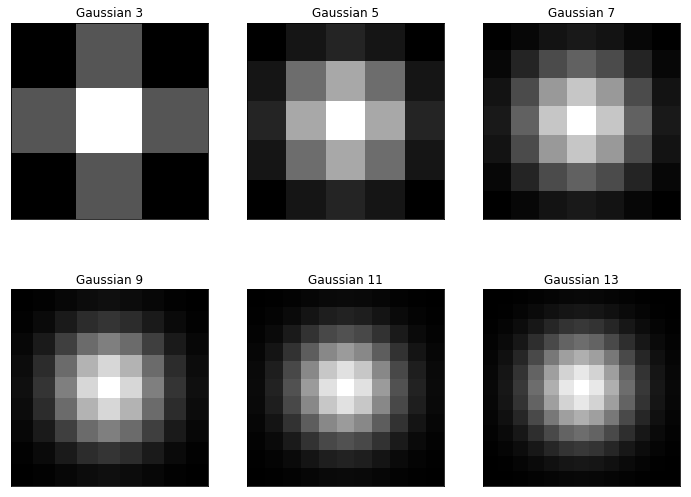

In [30]:
idx = 1
plt.figure(figsize=(12,9))
for k in range(3, 15, 2):
    # Create the gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(k, -1)
    
    gaussian_kernel_2d = np.dot(gaussian_kernel_1d,gaussian_kernel_1d.T)
    
    
    # Display the filtered image using matplotlib
    plt.subplot(230 + idx)
    plt.imshow(gaussian_kernel_2d, cmap=plt.cm.gray) #,interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian ' + str(k))
    idx +=1
       
plt.show()

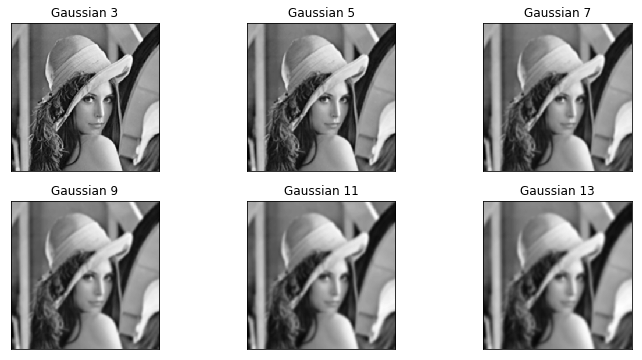

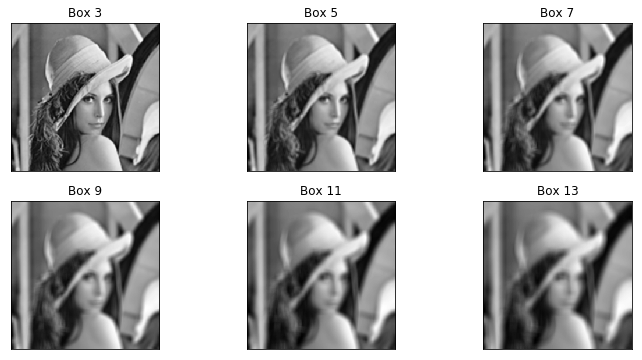

In [15]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(12,6))

idx = 1
for k in range(3, 15, 2):
    # Filter the image
    result = cv2.GaussianBlur(img, (k,k), -1)

    # Display the filtered image using matplotlib
    plt.subplot(230 + idx)
    plt.imshow(result, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian ' + str(k))
    idx +=1

plt.show()

# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(12,6))

idx = 1
for k in range(3, 15, 2):
    # Filter the image
    result = cv2.blur(img, (k,k), -1)

    # Display the filtered image using matplotlib
    plt.subplot(230 + idx)
    plt.imshow(result, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title('Box ' + str(k))
    idx +=1

plt.show()

- Compare with the results you obtained with the box filter. Is Gaussian filtering better?